To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 3 - Perceptron

## 3.1

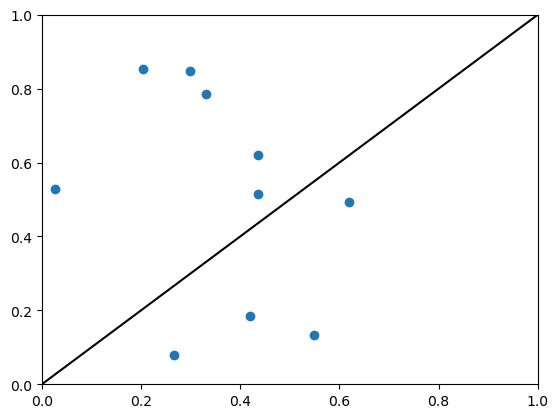

In [54]:
# your code starts here
import numpy as np
import pandas as pd

random.seed(2)

X_train = pd.DataFrame(np.stack((random.uniform(size=10), random.uniform(size=10)), axis=1), columns=['x_1', 'x_2'])
y_train = (X_train['x_1'] > X_train['x_2']).astype(int)

X_test = pd.DataFrame(np.stack((random.uniform(size=5000), random.uniform(size=5000)), axis=1), columns=['x_1', 'x_2'])
y_test = (X_test['x_1'] > X_test['x_2']).astype(int)

import matplotlib.pyplot as plt

plt.scatter(X_train['x_1'], X_train['x_2'])
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([0, 1], [0, 1], color='black')

1.0


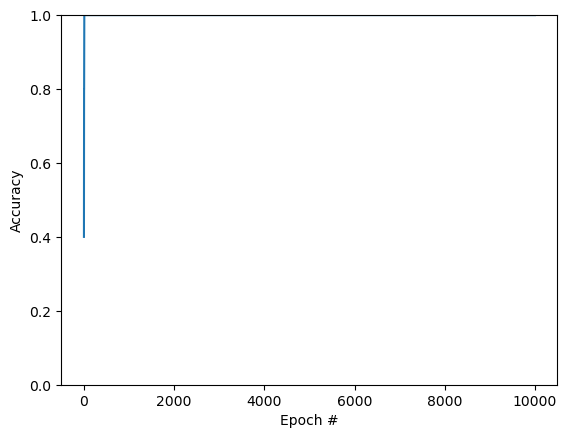

0.945


In [92]:
from sklearn.metrics import accuracy_score

class Perceptron:
    #constructor
    def __init__ (self):
        self.w = None
        self.b = None
    
    #model  
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    #predictor to predict on the data based on w
    def predict(self, X):
        Y = []
        for x in X.iterrows():
            x = x[1].values
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        wt_matrix = []
        #for all epochs
        for i in range(epochs):
            for x, y in zip(X.iterrows(), Y):
                x = x[1].values
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
            
            wt_matrix.append(self.w)    
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
        #checkpoint (Save the weights and b value)
        self.w = chkptw
        self.b = chkptb
        
        print(max_accuracy)
        #plot the accuracy values over epochs
        plt.plot(accuracy.values())
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()
        
        #return the weight matrix, that contains weights over all epochs
        return np.array(wt_matrix)

perceptron = Perceptron()

#epochs = 10000 and lr = 0.3
wt_matrix = perceptron.fit(X_train, y_train, 10000, 0.3)

#making predictions on test data
Y_pred_test = perceptron.predict(X_test)

#checking the accuracy of the model
print(accuracy_score(Y_pred_test, y_test))

In [77]:
for x, y in zip(X_train.iterrows(), y_train):
    print(x[1].values)
    print(y)

[0.4359949  0.62113383]
0
[0.02592623 0.52914209]
0
[0.54966248 0.13457995]
1
[0.43532239 0.51357812]
0
[0.4203678  0.18443987]
1
[0.33033482 0.78533515]
0
[0.20464863 0.85397529]
0
[0.61927097 0.49423684]
1
[0.29965467 0.84656149]
0
[0.26682728 0.07964548]
1


In [75]:
a = (1, 2)
a[0]

1

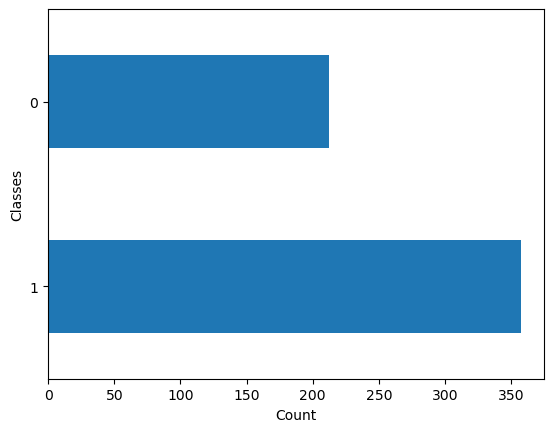

0.994140625


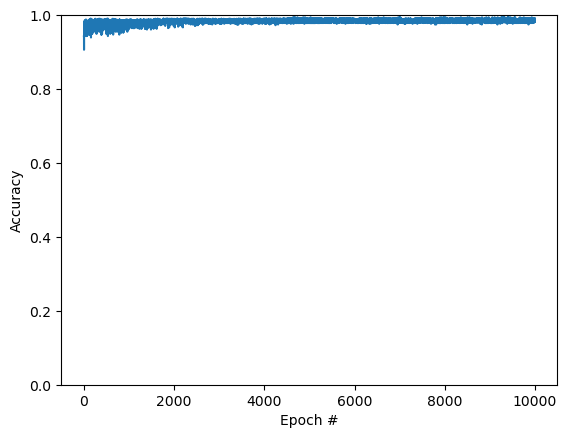

0.9824561403508771


In [94]:
#import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#load the breast cancer data
breast_cancer = sklearn.datasets.load_breast_cancer()

#convert the data to pandas dataframe.
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()
data.describe()

#plotting a graph to see class imbalance
data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

from sklearn.preprocessing import MinMaxScaler
#perform scaling on the data.
X = data.drop("class", axis = 1)
Y = data["class"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)

#train test split.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)


from sklearn.metrics import accuracy_score

class Perceptron:

  #constructor
  def __init__ (self):
    self.w = None
    self.b = None

  #model  
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0

  #predictor to predict on the data based on w
  def predict(self, X):
    Y = []
    for x in X.iterrows():
      x = x[1].values
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epochs = 1, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      for x, y in zip(X.iterrows(), Y):
        x = x[1].values
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1

      wt_matrix.append(self.w)    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #checkpoint (Save the weights and b value)
    self.w = chkptw
    self.b = chkptb

    print(max_accuracy)
    #plot the accuracy values over epochs
    plt.plot(accuracy.values())
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.ylim([0, 1])
    plt.show()

    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)

perceptron = Perceptron()

#epochs = 10000 and lr = 0.3
wt_matrix = perceptron.fit(X_train, Y_train, 10000, 0.3)

#making predictions on test data
Y_pred_test = perceptron.predict(X_test)

#checking the accuracy of the model
print(accuracy_score(Y_pred_test, Y_test))

**Answer:**



## 3.2

In [ ]:
# your code starts here

**Answer:**

## 3.3

**Answer:**

## 3.4

**Answer:**